In [1]:
# we use function transformation to convert non normal distributed data into normal distributed data

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv("loan.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# lets work on CoapplicantIncome;

C:\Users\santo\AppData\Local\Temp\ipykernel_18840\126173887.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


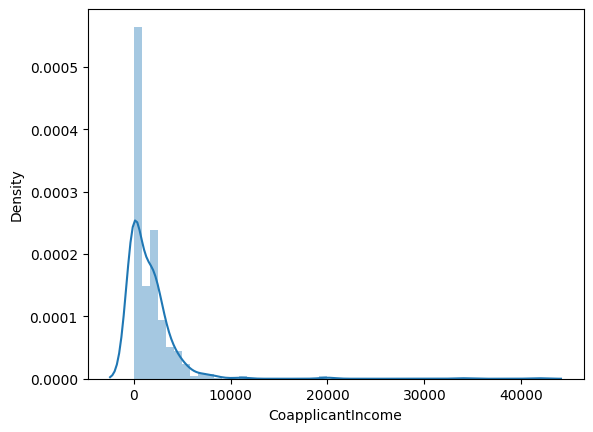

In [6]:
# plottinng the graph of coapplicantincome we can see if its normal distribution or not
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [7]:
# this data have outliers so lets first remove the outliers;

In [8]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
q1,q3

(np.float64(0.0), np.float64(2297.25))

In [10]:
IQR = q3-q1
IQR

np.float64(2297.25)

In [11]:
min_r = q1 - (1.5*IQR)
max_r = q3 + (1.5*IQR)
min_r,max_r

(np.float64(-3445.875), np.float64(5743.125))

In [12]:
dataset = dataset[dataset["CoapplicantIncome"]<=max_r]

C:\Users\santo\AppData\Local\Temp\ipykernel_18840\728033856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


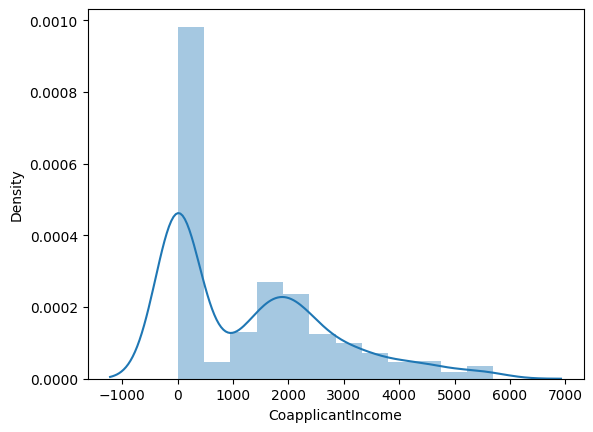

In [13]:
# we removed the outliers now lets see the graph again:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [15]:
# the graph is a non normal distribution , we have to convert it into normal distribution
# for that we will use function transformation;

In [16]:
from sklearn.preprocessing import FunctionTransformer

In [19]:
ft = FunctionTransformer(func=np.log1p) # we can use other functions like x^2 , xlogx etc

In [20]:
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [22]:
ft.transform(dataset[["CoapplicantIncome"]])

,CoapplicantIncome
0,0.000000
1,7.319202
2,0.000000
3,7.765993
4,0.000000
...,...
609,0.000000
610,0.000000
611,5.484797
612,0.000000


In [29]:
dataset["CoapplicantIncome_tf"] = ft.transform(dataset[["CoapplicantIncome"]])

C:\Users\santo\AppData\Local\Temp\ipykernel_18840\344308209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])


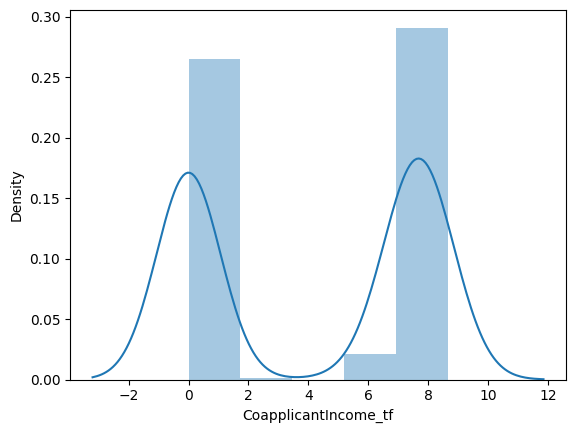

In [30]:
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.show()

In [31]:
# now the graph is in normal distribution

In [32]:
# lets use another function:
ft2 = FunctionTransformer(func=lambda x: x**2)
ft2.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<function <lambda> at 0x000001AD491028E0>)

In [33]:
ft2.transform(dataset[["CoapplicantIncome"]])

,CoapplicantIncome
0,0.0
1,2274064.0
2,0.0
3,5560164.0
4,0.0
...,...
609,0.0
610,0.0
611,57600.0
612,0.0


In [36]:
dataset["CoapplicantIncome_tf2"] = ft2.transform(dataset[["CoapplicantIncome"]])

C:\Users\santo\AppData\Local\Temp\ipykernel_18840\210494770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf2"])


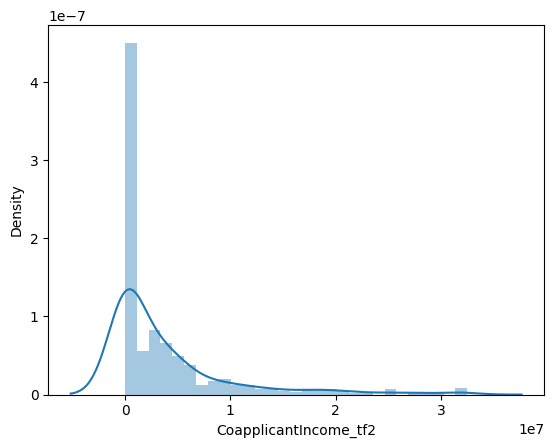

In [37]:
sns.distplot(dataset["CoapplicantIncome_tf2"])
plt.show()